### Titanic

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_excel('c:/data/titanic/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [31]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [32]:
raw_data.describe().T['mean']

pclass        2.294882
survived      0.381971
age          29.881135
sibsp         0.498854
parch         0.385027
fare         33.295479
body        160.809917
Name: mean, dtype: float64

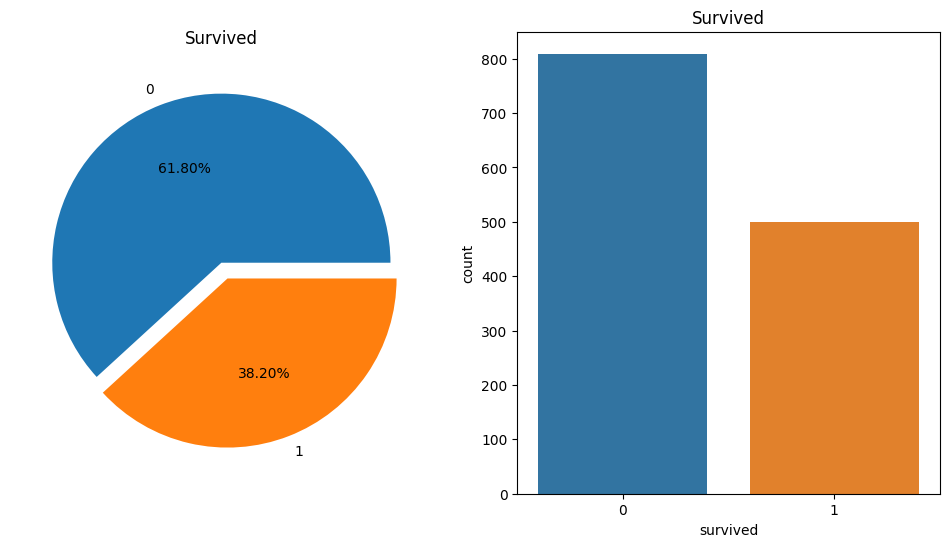

In [33]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<Axes: >

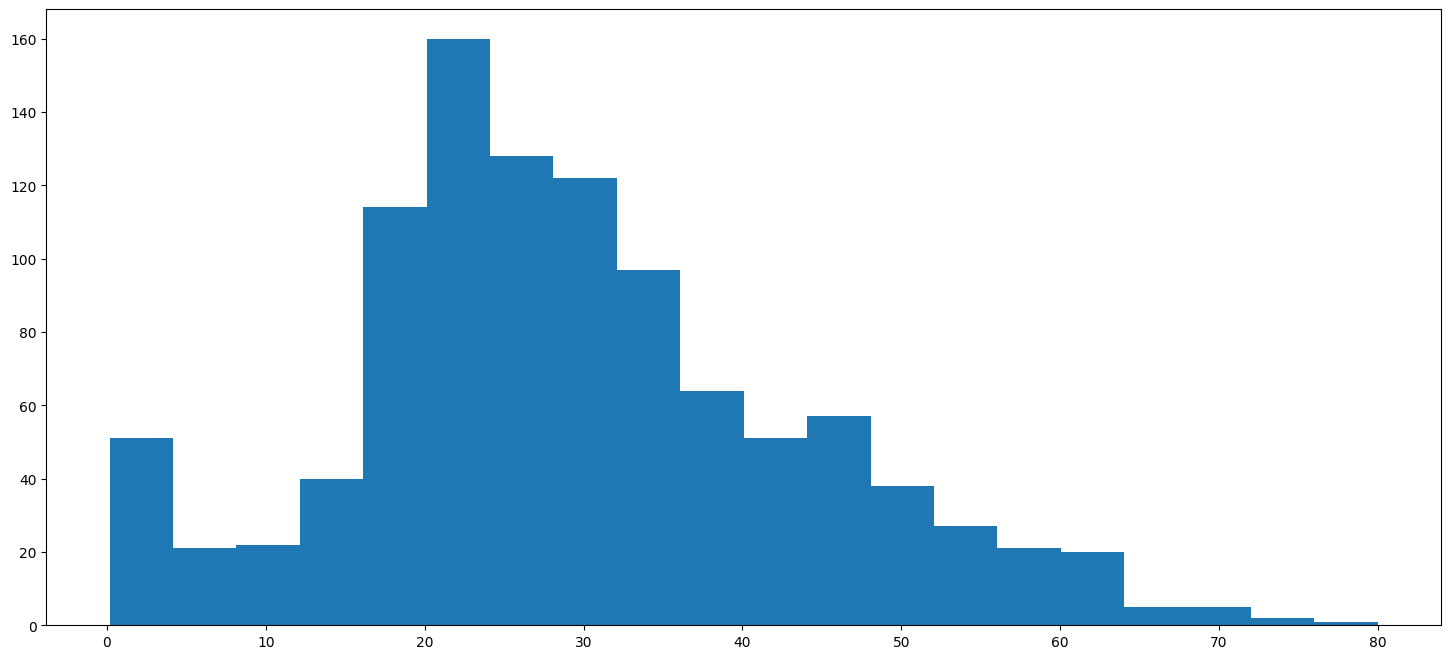

In [34]:
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False)

In [35]:
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [36]:
raw_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [37]:
raw_data.groupby('pclass').mean(numeric_only=True)

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


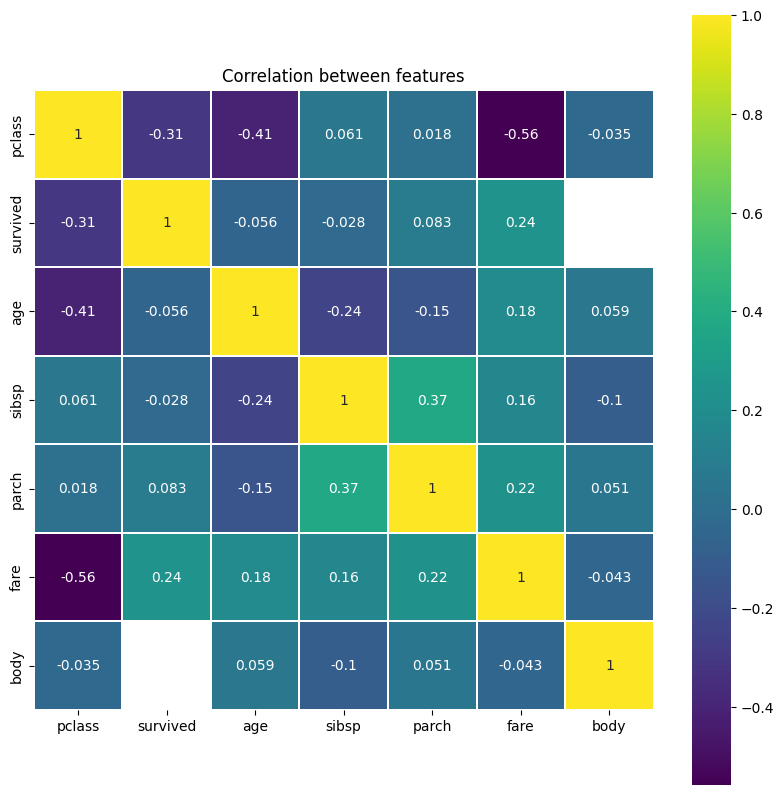

In [38]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(numeric_only=True), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

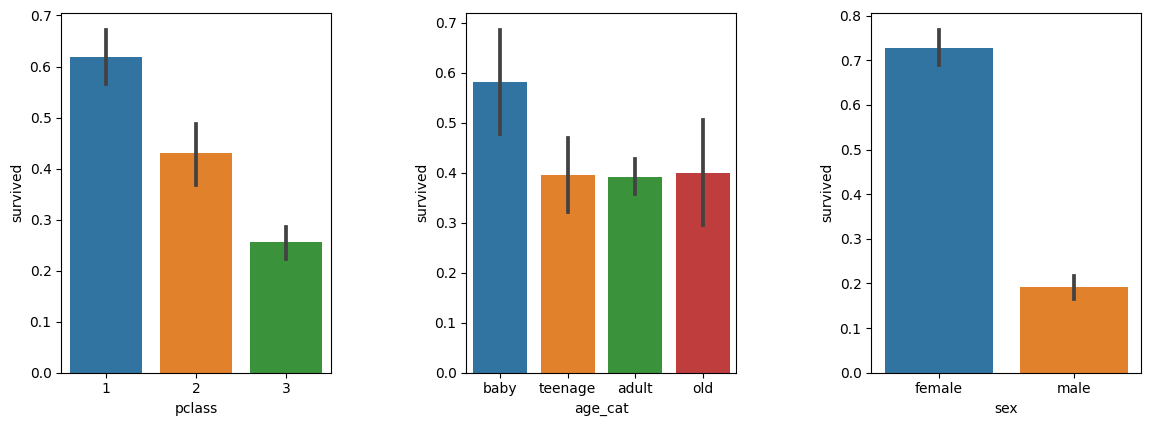

In [39]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=raw_data)
plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=raw_data)
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15220\2973452031.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 0) & (raw_data["age"].notnull())],
C:\Users\user\AppData\Local\Temp\ipykernel_15220\2973452031.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 1) & (raw_data["age"].notnull())],


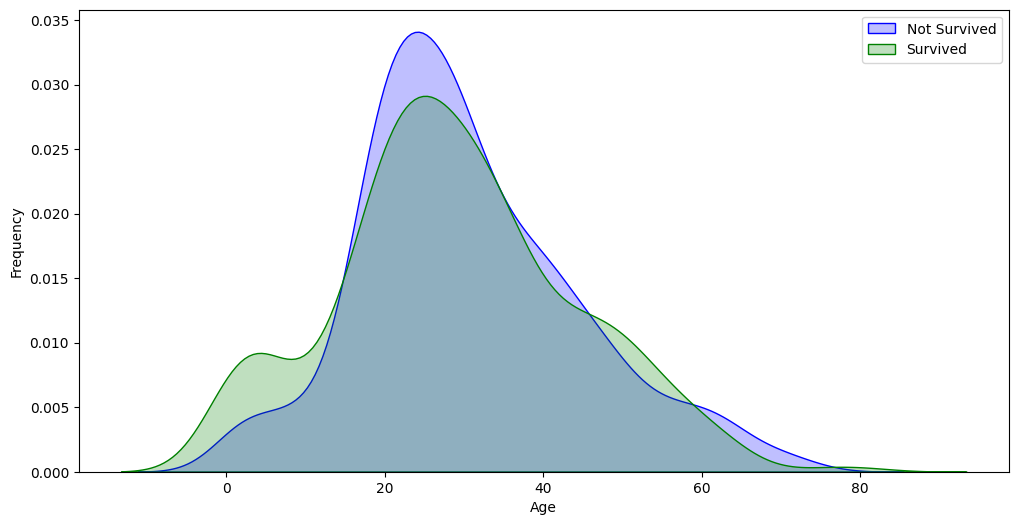

In [40]:
f,ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 0) & (raw_data["age"].notnull())], 
                ax = ax, color="Blue", shade = True)
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 1) & (raw_data["age"].notnull())], 
                ax =g, color="Green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

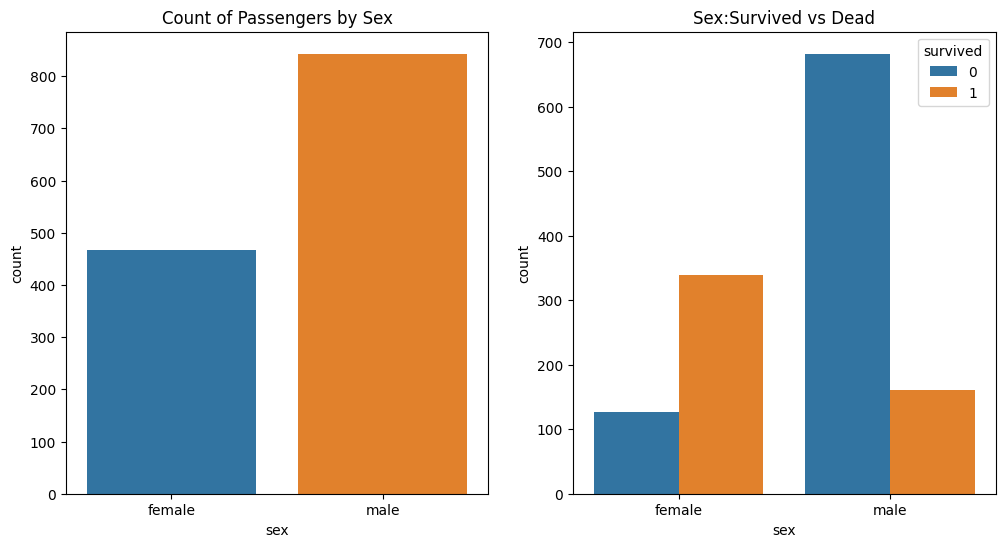

In [41]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot(x='sex',hue='survived',data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

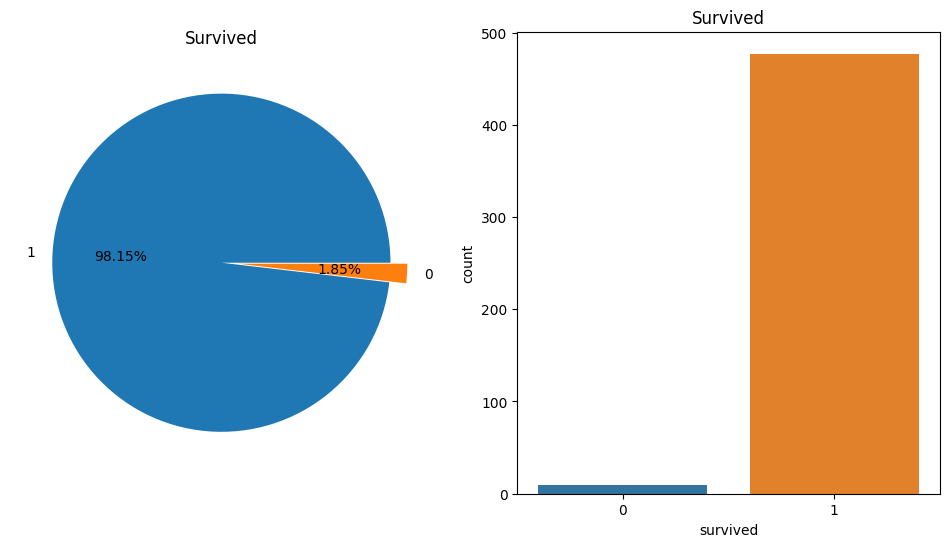

In [42]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
f,ax=plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived',data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [43]:
raw_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
age_cat       263
dtype: int64

In [44]:
tmp = []

# 레벨 인코딩 모듈을 사용하면 female이 0이 되고, male이 1이 됨 (오름차순에 의해)
# 사용자가 원하는 매칭 값이 다르므로 직접 구현함
# 하단의 for 없이 map 명령어 사용을 권장
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

# 결측치 처리 - null값 있는 행 삭제
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(8), object(6)
memory usage: 123.7+ KB


In [45]:
raw_data.values[:, [0,3,4,5,6,8]]

array([[1.0, 1.0, 29.0, 0.0, 0.0, 211.3375],
       [1.0, 0.0, 0.9167, 1.0, 2.0, 151.55],
       [1.0, 1.0, 2.0, 1.0, 2.0, 151.55],
       ...,
       [3.0, 0.0, 26.5, 0.0, 0.0, 7.225],
       [3.0, 0.0, 27.0, 0.0, 0.0, 7.225],
       [3.0, 0.0, 29.0, 0.0, 0.0, 7.875]], dtype=object)

In [46]:
x_data = raw_data.values[:, [0,3,4,5,6,8]]
y_data = raw_data.values[:, [1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.1, random_state=7)

In [47]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

print('tensorflow version : ', tf.__version__)
print('keras version : ', keras.__version__)

tensorflow version :  2.8.0
keras version :  2.8.0


In [48]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 255)               1785      
                                                                 
 dense_3 (Dense)             (None, 1)                 256       
                                                                 
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


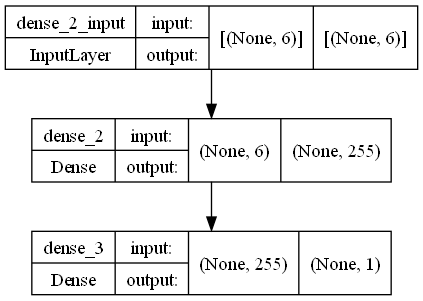

In [49]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
# tf.keras.utils.plot_model(model)
# plot_model(model, to_file='model.png')
plot_model(model, 
           #to_file='model_shapes.png', 
           show_shapes=True,
           show_layer_names=True
           )

In [50]:
X_train.astype(float)

array([[ 3.    ,  1.    , 45.    ,  0.    ,  0.    ,  7.75  ],
       [ 2.    ,  1.    , 24.    ,  1.    ,  0.    , 27.7208],
       [ 1.    ,  0.    , 47.    ,  0.    ,  0.    , 52.    ],
       ...,
       [ 2.    ,  0.    , 26.    ,  0.    ,  0.    , 13.    ],
       [ 2.    ,  1.    ,  0.9167,  1.    ,  2.    , 27.75  ],
       [ 1.    ,  1.    , 24.    ,  0.    ,  0.    , 49.5042]])

In [51]:
y_train.astype(int)

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

Epoch 1/500
30/30 [==============================] - 1s 5ms/step - loss: 0.2941 - accuracy: 0.6160 - val_loss: 0.2126 - val_accuracy: 0.6762
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.6798 - val_loss: 0.1825 - val_accuracy: 0.7810
Epoch 3/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.7213 - val_loss: 0.1752 - val_accuracy: 0.7810
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.7436 - val_loss: 0.1738 - val_accuracy: 0.7524
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.7426 - val_loss: 0.1666 - val_accuracy: 0.8000
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1713 - accuracy: 0.7617 - val_loss: 0.1778 - val_accuracy: 0.7524
Epoch 7/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.7617 - val_loss: 0.1583 - val_accuracy: 0.8000
Epoch 8/500
3

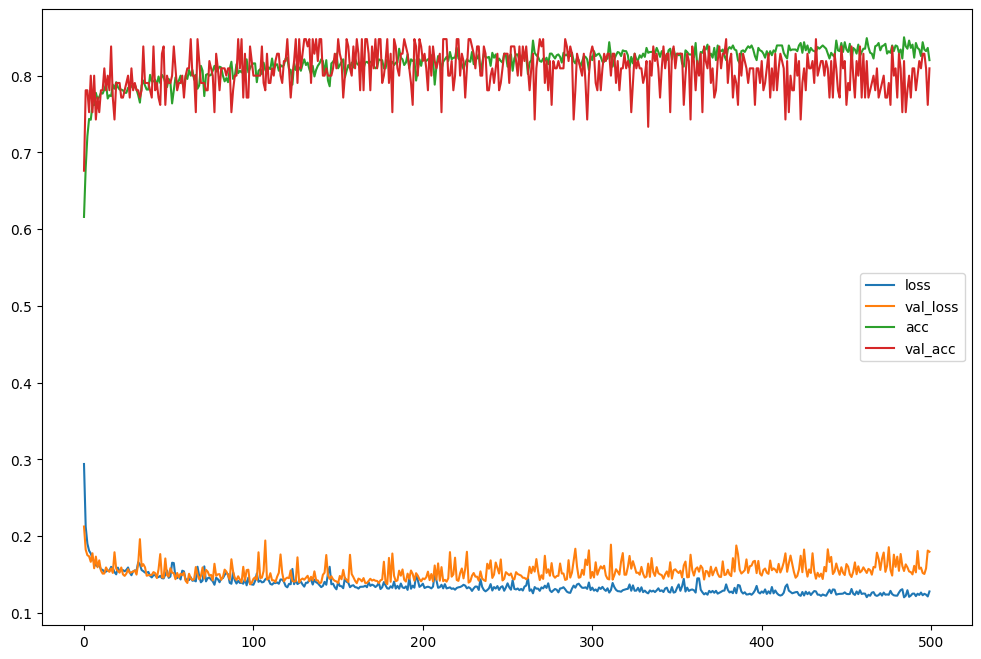

In [52]:
hist = model.fit(X_train.astype(float), y_train.astype(int), validation_data=(X_test.astype(float), y_test.astype(int)), epochs=500)

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()

In [53]:
list(hist.history)

['loss', 'accuracy', 'val_loss', 'val_accuracy']

In [54]:
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6)

model.predict(dicaprio), model.predict(winslet)
# 일반적으로 0.5를 기준으로 함
# dicaprio 생존률 10%
# winslet 생존률 99%

(array([[0.07261263]], dtype=float32), array([[0.99977237]], dtype=float32))

In [55]:
### sigmoid 출력값이 0~1사이
## 오차행렬에 들어갈 예측값
predict_y=model.predict(X_test.astype(float))

predict_y[predict_y>0.5]=1
predict_y[predict_y<=0.5]=0
# predict[:10]
real_y = y_test.copy()

In [56]:
import pandas as pd
from sklearn.metrics import confusion_matrix

conMatrix = confusion_matrix(predict_y, real_y.astype(float))
conMatrix

array([[59, 17],
       [ 3, 26]], dtype=int64)

In [57]:
# 오차행렬표를 데이터프레임으로 변환 (rywo 388쪽 가장하단)
# 오차행렬표를 데이터프레임으로 작업하지 않고, 차트로 보여주는 모듈도 있음.
cnt=len(conMatrix)
pd.DataFrame(conMatrix, 
             index=['true_%d' % i for i in range(cnt)],
             columns=['pred_%d' % i for i in range(cnt)] )

,pred_0,pred_1
true_0,59,17
true_1,3,26


Text(8.222222222222223, 0.5, 'true label')

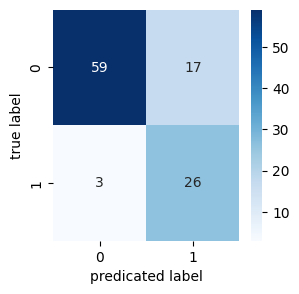

In [58]:
# 오차행렬표를 차트로 보여주는 작업_혼돈행렬
import seaborn as sns
plt.figure(figsize=(3,3))
sns.heatmap(conMatrix,annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicated label')
plt.ylabel('true label')